## Course: DSC550
## Assignment: 8.2 Exercise
## Name: Laura Hoffmann
## Date: 5/8/2021

#### Import the Libraries

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import yellowbrick
from yellowbrick.features import Rank2D
from yellowbrick.style import set_palette
from yellowbrick.features import ParallelCoordinates

# Week 6

#### Load the data from the “train.csv” file into a DataFrame

In [2]:
# Read the csv file into a pandas df
titanic = pd.read_csv('train.csv')

#### Display the dimensions of the file 

In [3]:
# Print the dimensions of the df
print('Dimensions:',titanic.shape)

Dimensions: (891, 12)


#### Display the first 5 rows of data so you can see the column headings and the type of data for each column

In [4]:
# Print first five rows of the df
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Look at summary information about your data

In [5]:
# Find what types of variables are in the df
# Numerical data
print("Describe Data:")
print(round(titanic.describe(),2))
print("*"*70)
# Text data
print("Summarized Data:")
print(titanic.describe(include=['O']))

Describe Data:
       PassengerId  Survived  Pclass     Age   SibSp   Parch    Fare
count       891.00    891.00  891.00  714.00  891.00  891.00  891.00
mean        446.00      0.38    2.31   29.70    0.52    0.38   32.20
std         257.35      0.49    0.84   14.53    1.10    0.81   49.69
min           1.00      0.00    1.00    0.42    0.00    0.00    0.00
25%         223.50      0.00    2.00   20.12    0.00    0.00    7.91
50%         446.00      0.00    3.00   28.00    0.00    0.00   14.45
75%         668.50      1.00    3.00   38.00    1.00    0.00   31.00
max         891.00      1.00    3.00   80.00    8.00    6.00  512.33
**********************************************************************
Summarized Data:
                               Name   Sex Ticket    Cabin Embarked
count                           891   891    891      204      889
unique                          891     2    681      147        3
top     Futrelle, Mr. Jacques Heath  male   1601  B96 B98        S
freq    

#### Make some histograms of your data

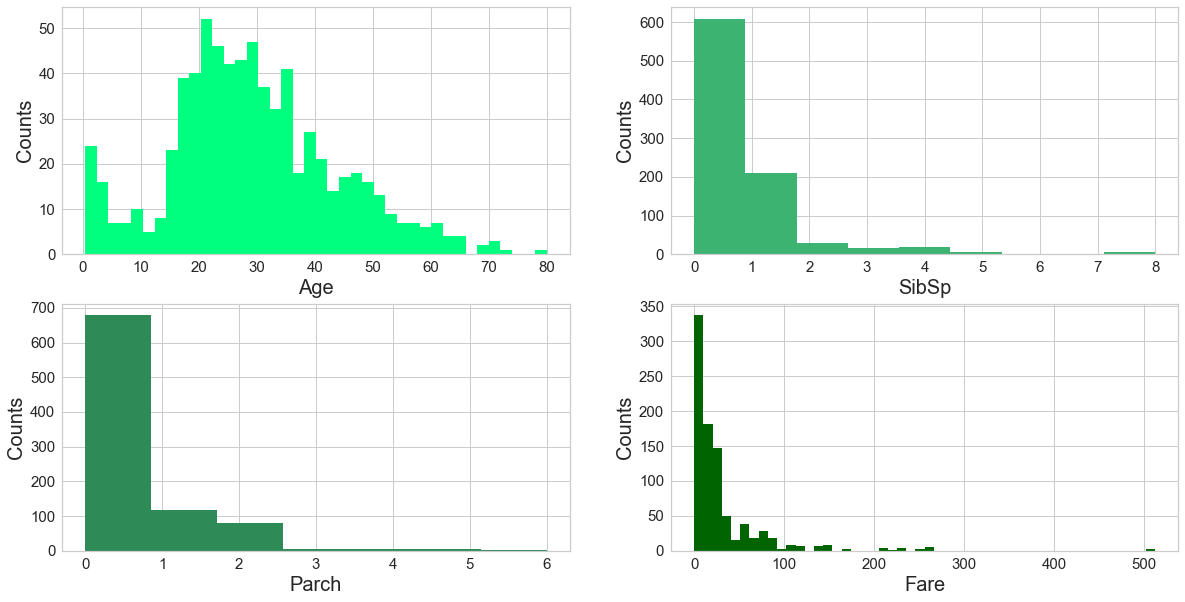

In [6]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# X axes, colors and bins
x_axes = ['Age', 'SibSp', 'Parch', 'Fare']
colors = ['springgreen', 'mediumseagreen', 'seagreen', 'darkgreen']
bins = [40, 9, 7, 50]

# Make the graphs
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(titanic[x_axes[idx]].dropna(), bins=bins[idx], color=colors[idx])
    ax.set_xlabel(x_axes[idx], fontsize=20)
    ax.set_ylabel('Counts', fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

#### Make some bar charts for variables with only a few options

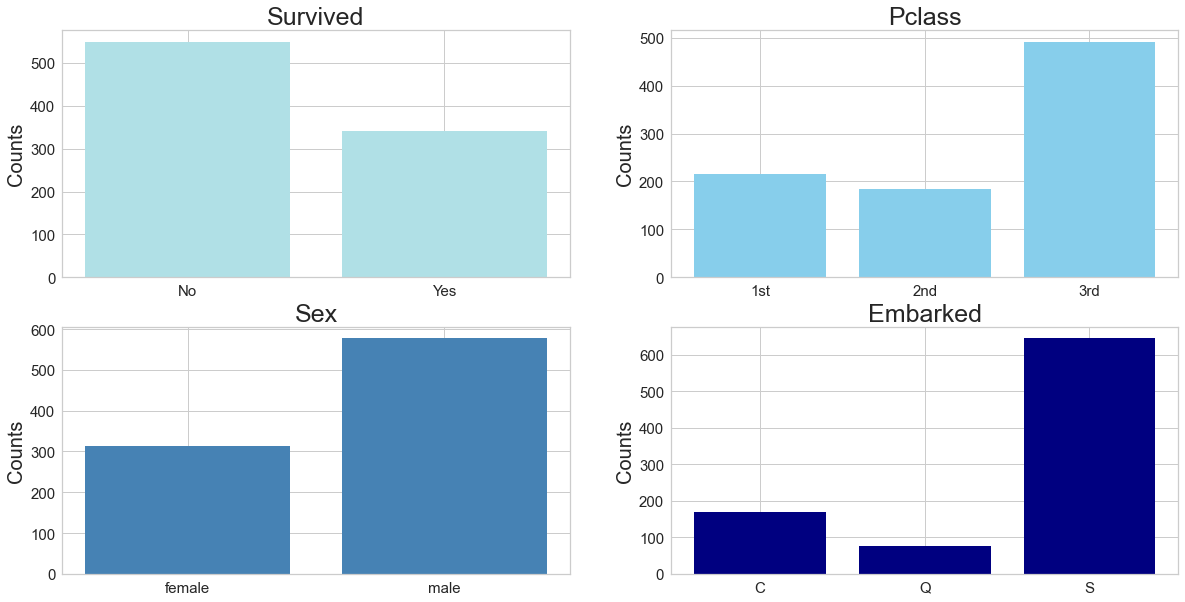

In [7]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Replace 1s as Yes and 0s as No, and feed into visualizer
X_Survived = titanic.replace({'Survived': {1: 'Yes', 0: 'No'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = titanic.replace({'Survived': {1: 'Yes', 0: 'No'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot, top left
axes[0, 0].bar(X_Survived, Y_Survived, color='powderblue')
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# Replace 1 as 1st class, 2 as 2nd class and 3 as 3rd class, and feed into visualizer
X_Pclass = titanic.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = titanic.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot, top right
axes[0, 1].bar(X_Pclass, Y_Pclass, color='skyblue')
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# Feed into visualizer
X_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = titanic.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot, bottom left
axes[1, 0].bar(X_Sex, Y_Sex, color='steelblue')
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# Feed into visualizer
X_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = titanic.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot, bottom right
axes[1, 1].bar(X_Embarked, Y_Embarked, color='navy')
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)


plt.show()

#### To see if the data is correlated, make some Pearson Ranking charts

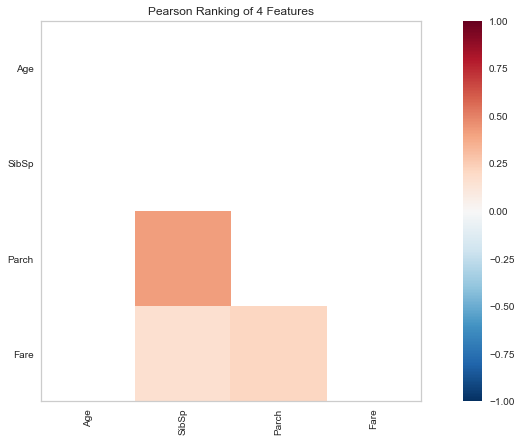

In [8]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)

# Extract the numpy arrays from the data frame
X = titanic[x_axes].values

visualizer = Rank2D(features=x_axes, algorithm='pearson')

# Fit the data to the visualizer
visualizer.fit(X)
# Transform the data
visualizer.transform(X)
# Draw/show/poof the data
visualizer.poof()

#### Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive

In [9]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# Set up the color for yellowbrick visulizer
set_palette('sns_bright')

# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']

In [10]:
# Copy data to a new dataframe
data_norm = titanic.copy()

# Normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (titanic[feature] - titanic[feature].mean(skipna=True)) / (titanic[feature].max(skipna=True) - titanic[feature].min(skipna=True))

In [11]:
# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = titanic.Survived.values

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)

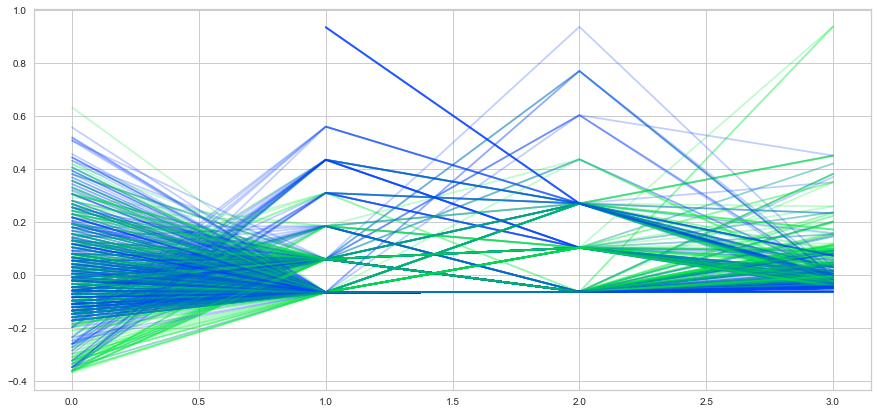

In [12]:
# Fit the data to the visualizer
visualizer.fit(X, y)

# Transform the data
visualizer.transform(X)

plt.show()

#### Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.

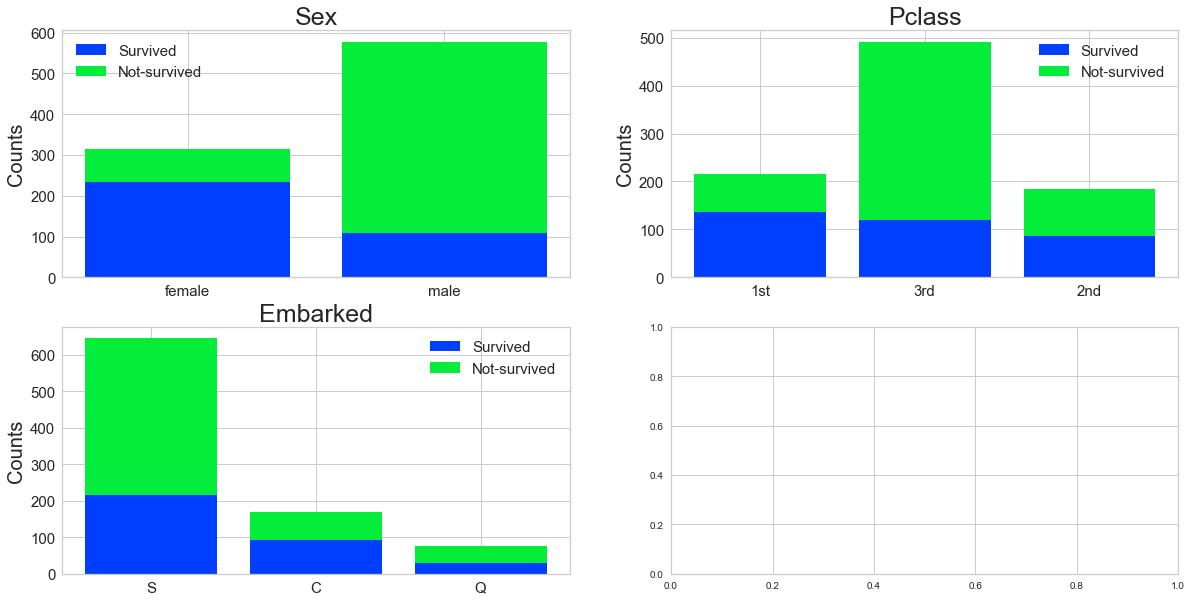

In [13]:
# Set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# Make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# Make the data read to feed into the visulizer
# Change survived labels, get value counts
Sex_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Sex'].value_counts()
Sex_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)

# Make the bar plot top left plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)


# Make the data read to feed into the visulizer
# Change survive labels and class labels, get value counts
Pclass_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[titanic['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)

# Make the bar plot top right plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)


# Make the data read to feed into the visulizer
# Change the survive labels, get value counts
Embarked_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = titanic.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[titanic['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)

# Make the bar plot bottom left plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)

# Week 7

### Fill in missing values and eliminate features

#### Fill the missing age data with median value

In [14]:
import numpy as np

In [15]:
# function to fill in missing data with the median
def fill_na_median(data, inplace=True):
    return data.fillna(data.median(), inplace=inplace)

In [16]:
# fill in age column
fill_na_median(titanic['Age'])

In [17]:
# check
titanic['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

#### Fill the missing embarked data with the most represented value

In [18]:
# function to fill in missing values with the mode
def fill_na_most(data, inplace=True):
    return data.fillna('S', inplace=inplace)

In [19]:
# fill in embarked
fill_na_most(titanic['Embarked'])

In [20]:
# check
titanic['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

### Log tranformation for Fare data

In [21]:
# fucntion to apply log transformation
def log_transformation(data):
    return data.apply(np.log1p)

In [22]:
# apply log transformation to fare
titanic['Fare_log1p'] = log_transformation(titanic['Fare'])

In [23]:
# check
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Fare_log1p
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,2.962246
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.969048
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,2.187218
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,2.737881
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,3.465736
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,6.240917


### Adjust skewed data (fare), check distribution using histogram 

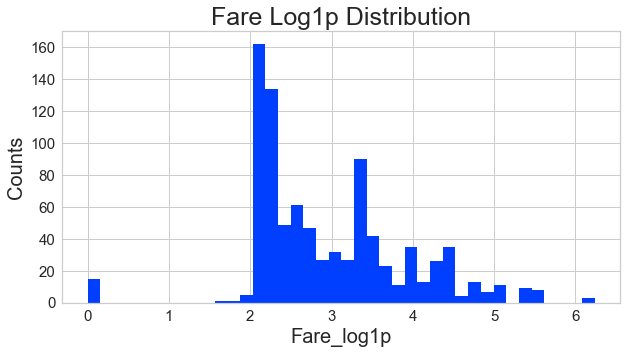

In [24]:
# build a histogram to check fare log distribution
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(titanic['Fare_log1p'], bins=40)
plt.title('Fare Log1p Distribution', fontsize=25)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

### Convert categorical data to numbers, get the categorical data

In [25]:
# categorical features list
cat_features = ['Pclass', 'Sex', 'Embarked']
titanic_cat = titanic[cat_features]
titanic_cat = titanic_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

#### One hot encoding

In [26]:
titanic_cat_dummies = pd.get_dummies(titanic_cat)

In [27]:
titanic_cat_dummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


# Week 8

In [28]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

## Step 14

In [29]:
# create a whole features dataset that can be used for train and validation data splitting
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([titanic[features_model], titanic_cat_dummies], axis=1)

In [30]:
# create a whole target dataset that can be used for train and validation data splitting
data_model_y = titanic.Survived

In [31]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [32]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  623
No. of samples in validation set: 268


In [33]:
# Survived and not-survived (training set)
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())



No. of survived and not-survived in the training set:
0    373
1    250
Name: Survived, dtype: int64


In [34]:
# Survived and not-survived (testing set)
print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())



No. of survived and not-survived in the validation set:
0    176
1     92
Name: Survived, dtype: int64


## Step 15

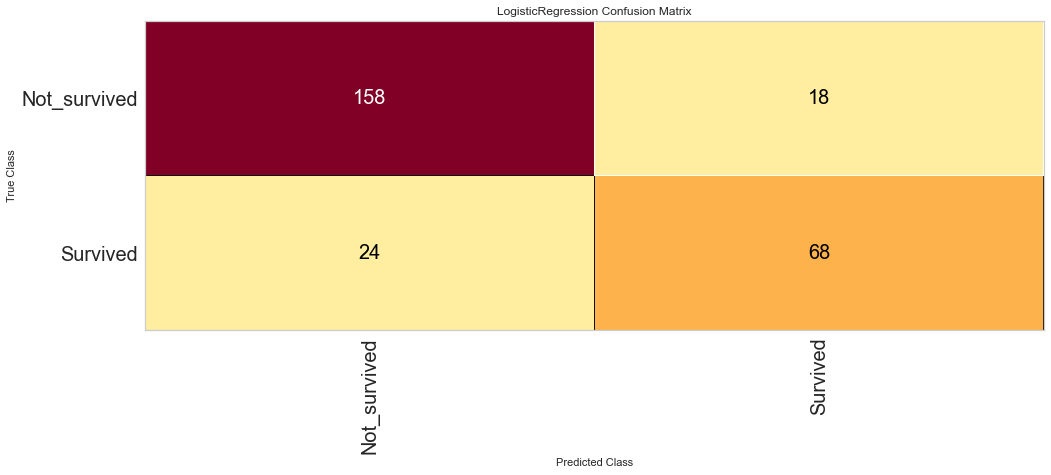

In [38]:
# Instantiate the classification model 
model = LogisticRegression(solver='liblinear')

#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

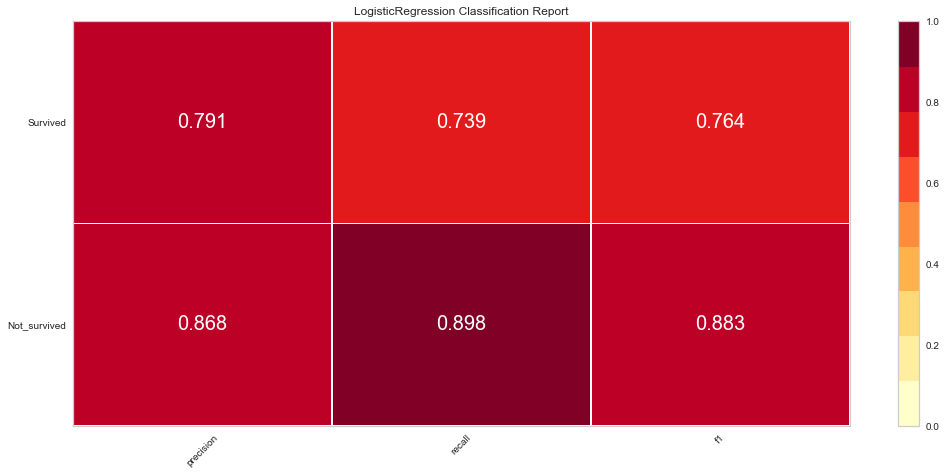

In [36]:
# set the size of the figure and the font size 
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

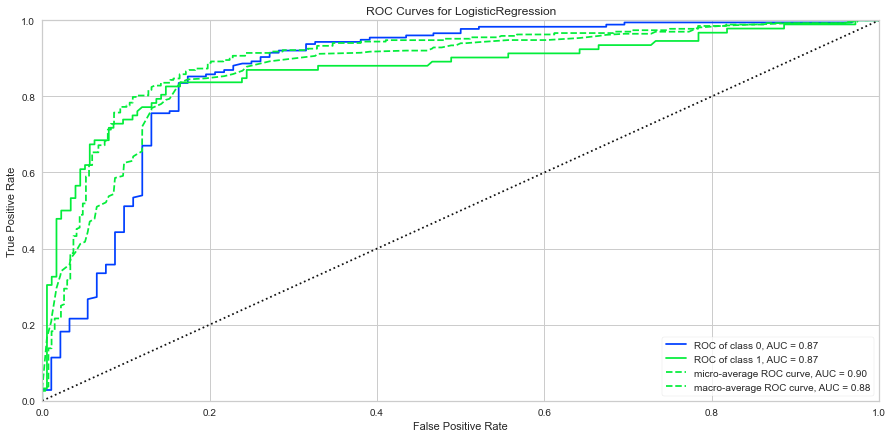

In [37]:
# Instantiate the visualizer
visualizer = ROCAUC(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data